In [1]:
from peri import util
from peri.viz.interaction import OrthoViewer
import matplotlib



2019-08-06 15:38:08,103 - WARNING - peri.fft - No wisdom present, generating some at '/Users/s1101153/.peri-wisdom.pkl'


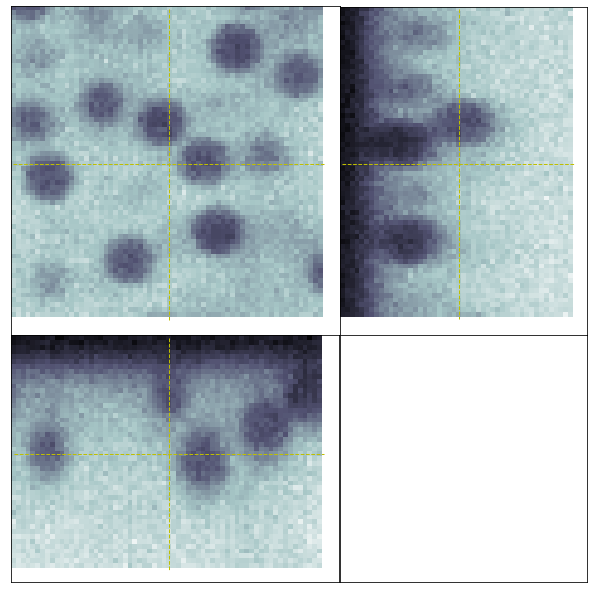

In [2]:
im = util.RawImage('../../Downloads/small_confocal_image.tif')
OrthoViewer(im.get_image())

In [3]:
import numpy
from peri.comp import objs
coverslip = objs.Slab(zpos=6)
particle_positions = numpy.load('../../Downloads/particle-positions.npy')
particle_radii = 5.0
particles = objs.PlatonicSpheresCollection(particle_positions, particle_radii)

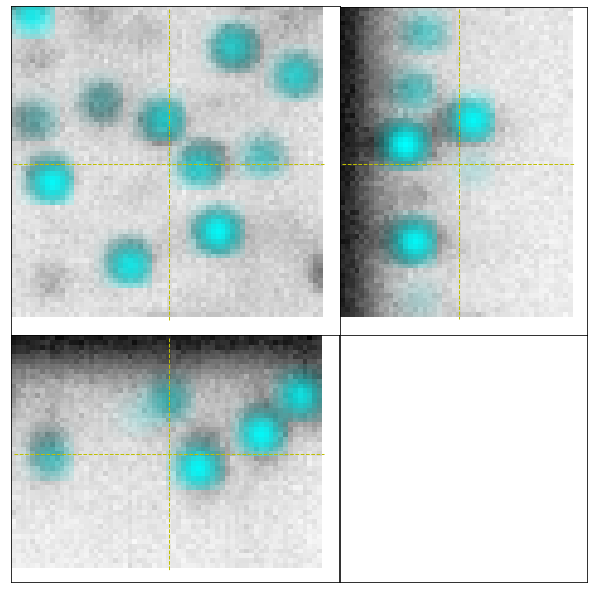

In [4]:
from peri.viz.interaction import OrthoPrefeature
OrthoPrefeature(im.get_image(), particle_positions, viewrad=3.0)

In [5]:
from peri.comp import comp
objects = comp.ComponentCollection([particles, coverslip], category = 'obj')

In [6]:
from peri.comp import ilms
illumination = ilms.BarnesStreakLegPoly2P1D(npts=(16, 10, 8, 4), zorder=8)

In [7]:
background = ilms.LegendrePoly2P1D(order=(7,2,2), category='bkg')

In [8]:
offset = comp.GlobalScalar(name='offset', value=0.)

In [9]:
from peri.comp import exactpsf
point_spread_function = exactpsf.FixedSSChebLinePSF()

In [10]:
from peri import models
model = models.ConfocalImageModel()

In [12]:
print(model)

ConfocalImageModel : H(I*(1-P)+C*P) + B


In [13]:
from peri import states
st = states.ImageState(im, [objects, illumination, background, point_spread_function, offset], mdl=model)

In [14]:
from peri import runner
runner.link_zscale(st)

In [15]:
print(st.error)

8087.551041476324


In [16]:
runner.optimize_from_initial(st)

2019-08-06 15:46:49,821 - INFO - peri.runner - Initial burn:
2019-08-06 15:46:49,830 - INFO - peri.opt - Start of loop 0:	8087.551041
/Users/s1101153/anaconda3/envs/peri3Test/lib/python3.7/site-packages/peri-0.1.2-py3.7.egg/peri/states.py:38: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
2019-08-06 15:47:33,126 - INFO - peri.opt - Globals,   loop 0:	162.77247965594847
2019-08-06 15:48:01,113 - INFO - peri.opt - Particles, loop 0:	107.82829329978449
2019-08-06 15:48:24,909 - INFO - peri.opt - Globals,   loop 1:	98.39867101922798
2019-08-06 15:48:41,146 - INFO - peri.opt - Particles, loop 1:	95.11963536260151
2019-08-06 15:49:26,963 - INFO - peri.opt - Globals,   loop 2:	93.9479159924009
2019-08-06 15:49:36,199 - INFO - peri.opt - Particles, loop 2:	93.7709797112203

ImageState [
    stats: E=67.08740050441047 LL=-333162221.7505245
    model: ConfocalImageModel : H(I*(1-P)+C*P) + B
    image: RawImage <../../Downloads/small_confocal_image.tif: Tile [0, 0, 0] -> [48, 64, 64] ([48, 64, 64])>
    ----------------------------------------------------------------------
    obj: ComponentCollection [
        obj: PlatonicSpheresCollection N=46, zscale=0.8636137896756729
        obj: Slab <{'slab-zpos': 4.98439955451367, 'slab-theta': -0.002082644433564255, 'slab-phi': -0.0008874630576409048}>
    ]
    ilm: BarnesStreakLegPoly2P1D [(16, 10, 8, 4) 8]
    bkg: LegendrePoly2P1D [(7, 2, 2)]
    psf: FixedSSChebLinePSF [35 17 25]
    offset: GlobalScalar [{'offset': 2.007597231247244}]
]

In [17]:
print(st.error)

67.08740050441047


In [18]:
runner.finish_state(st)

------------------------------ADDING------------------------------
  Z	  Y	  X	  R	|	 ERR0		 ERR1
------------------------------ADDING------------------------------
  Z	  Y	  X	  R	|	 ERR0		 ERR1
------------------------------ADDING------------------------------
  Z	  Y	  X	  R	|	 ERR0		 ERR1
------------------------------ADDING------------------------------
  Z	  Y	  X	  R	|	 ERR0		 ERR1
26.59	67.57	29.29	5.31	|	67.087  	66.854
------------------------------ADDING------------------------------
  Z	  Y	  X	  R	|	 ERR0		 ERR1
------------------------------ADDING------------------------------
  Z	  Y	  X	  R	|	 ERR0		 ERR1
------------------------------ADDING------------------------------
  Z	  Y	  X	  R	|	 ERR0		 ERR1
------------------------------ADDING------------------------------
  Z	  Y	  X	  R	|	 ERR0		 ERR1
------------------------------ADDING------------------------------
  Z	  Y	  X	  R	|	 ERR0		 ERR1
2019-08-06 16:08:52,213 - INFO - peri.opt - Start  ``finish``:	66.75304220943

In [19]:
print(st.error)

66.40581639424107


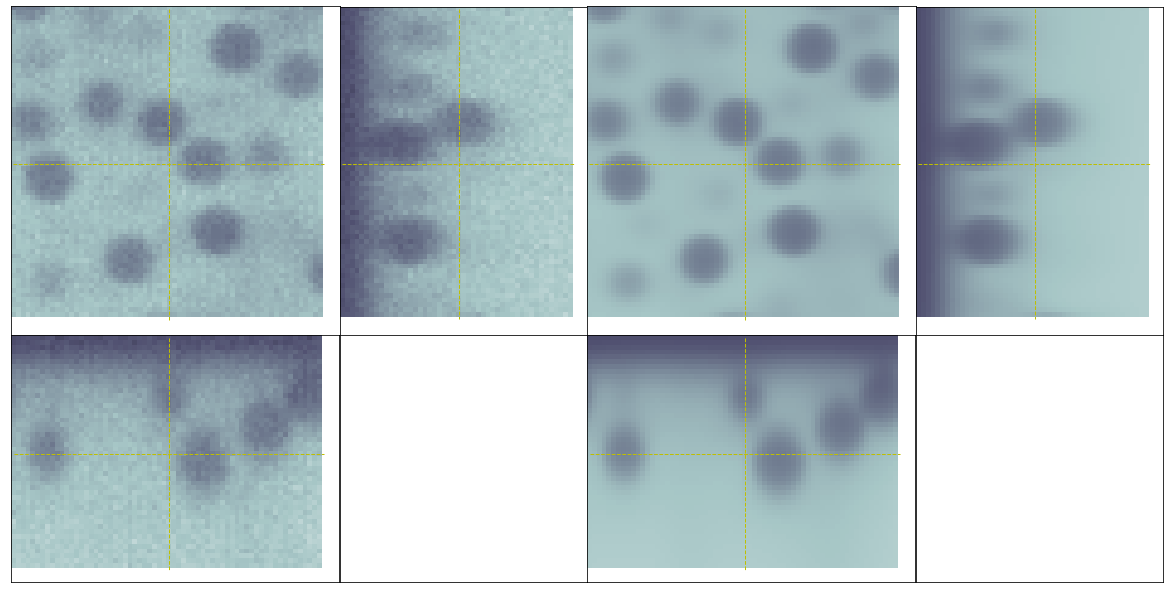

In [20]:
from peri.viz.interaction import OrthoManipulator
OrthoManipulator(st)

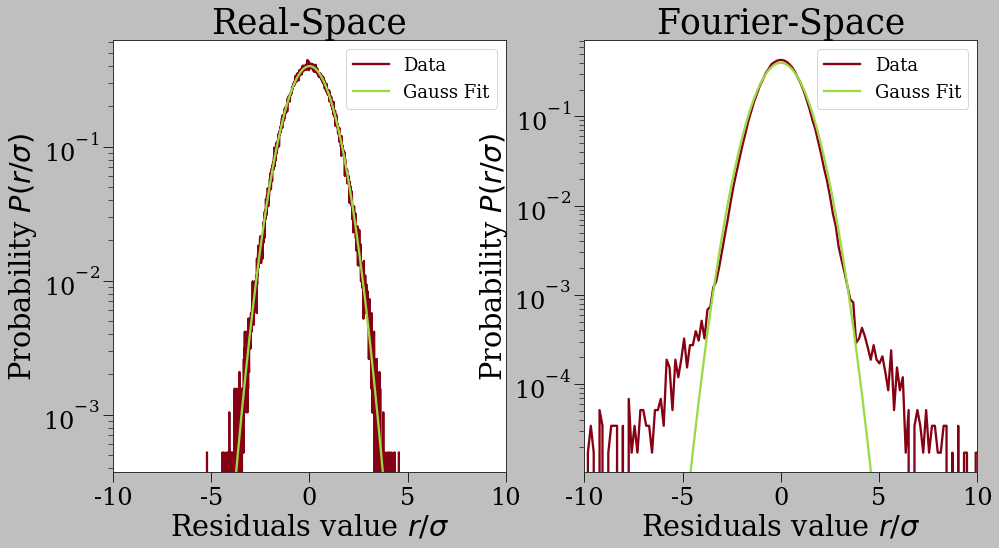

In [21]:
from peri.viz import plots
plots.examine_unexplained_noise(st)

From the walkthrough document, it's clear that if we're looking at the residuals pixel-by-pixel in the image, we should be looking in Fourier space. If we wanted to change something:

In [23]:
old_ilm = st.get('ilm')
new_ilm = ilms.BarnesStreakLegPoly2P1D(npts=(50,40,20,20), zorder=7)
st.set('ilm', new_ilm)

Fit the new state before optimising, to speed up the process of reoptimising the model for the new input

In [24]:
import peri.opt.optimize as opt
opt.fit_comp(new_ilm, old_ilm)

See walkthrough doc for more info https://peri-source.github.io/peri-docs/walkthrough.html